In [1]:
!pip install keras-facenet
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 54.8 MB/s eta 0:00:00
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10385 sha256=3facd0e989566e5a77bb7acb2bdd8a442805337f84053e6d5f4ccf20ecfe335d
  Stored in directory: /root/.cache/pip/wheels/73/5d/41/90b5d28ca667cfc4748ae859fa4f0b85b936d73207a073ded5
Successfully built keras-facenet
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install opendatasets
import opendatasets as od
import pandas
%cd /content/drive/MyDrive/CIE555/Project1/
od.download("https://www.kaggle.com/datasets/dansbecker/5-celebrity-faces-dataset")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[Errno 2] No such file or directory: '/content/drive/MyDrive/CIE555/Project1/'
/content
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: amrelmasry201901202
Your Kaggle Key: ··········


100%|██████████| 5.03M/5.03M [00:00<00:00, 146MB/s]

In [4]:
%cd /content/drive/MyDrive/SiameseProject

/content/drive/MyDrive/SiameseProject


In [5]:
from PIL import Image
from mtcnn.mtcnn import MTCNN
import numpy as np
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

1/1 [==============================] - 0s 219ms/step


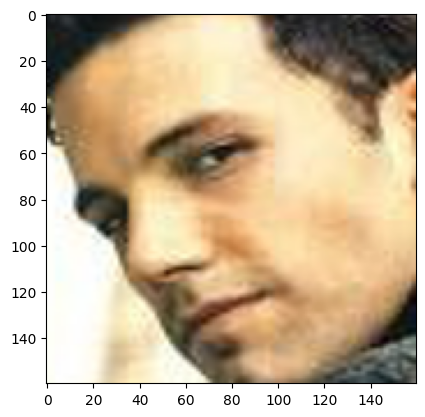

(160, 160, 3)


In [6]:
import matplotlib.pyplot as plt 
# load the photo and extract the face
pixels = extract_face('./5-celebrity-faces-dataset/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')
plt.imshow(pixels)
plt.show()
print(pixels.shape)

In [7]:
%ls 5-celebrity-faces-dataset/train/ben_afflek

httpcsvkmeuaeccjpg.jpg
httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg
httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg
httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg
httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg
httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg
httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg
httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg
httptrwebimgacstanetcxbdddmediasnmediajpg.jpg
httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg
httpwwwallposterscomimagesPostersPFjpg.jpg
httpwwwfilmscoopitcgibinattoriBENAFFLECKBENAFFLECKjpg.jpg
httpwwwhillsindcomstorebenjpg.jpg
httpwwwrumenewscomwpcontentuploadsbenafflekxpng.jpg


In [8]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]

In [9]:
from keras_facenet import FaceNet
def Face_Verification(image_1, image_2):
  pixels_1 = extract_face(image_1)
  pixels_2 = extract_face(image_2)
  embedder = FaceNet()
  # get the face embedding for one face
  facenet_model=embedder.model
  detect_face1 = get_embedding(facenet_model, pixels_1)
  detect_face2 = get_embedding(facenet_model, pixels_2)
  dd = embedder.compute_distance(detect_face1, detect_face2)
  string = ''
  if dd<.5:
    string = 'Same Person'
  else:
    string = 'different person'
  return [string, dd]

In [10]:
#Different Persons Verification
ii='/content/drive/MyDrive/SiameseProject/5-celebrity-faces-dataset/train/elton_john/httpiamediaimdbcomimagesMMVBMTAxNDUMzUwOTdeQTJeQWpwZBbWUMDUOTAyNTIVUXCRALjpg.jpg'
jj='/content/drive/MyDrive/SiameseProject/5-celebrity-faces-dataset/train/jerry_seinfeld/httpimagesrottentomatoescomimagesspotlightsnewsjerryseinfeldjpg.jpg'
verification = Face_Verification(ii, jj)
verification

1/1 [==============================] - 0s 232ms/step


1/1 [==============================] - 0s 32ms/step


['different person', 0.9878862323239446]

In [11]:
#Same Persons Verification
ii='/content/drive/MyDrive/SiameseProject/5-celebrity-faces-dataset/train/madonna/httpiamediaimdbcomimagesMMVBMTANDQNTAxNDVeQTJeQWpwZBbWUMDIMjQOTYVUXCRALjpg.jpg'
jj='/content/drive/MyDrive/SiameseProject/5-celebrity-faces-dataset/train/madonna/httpimagegaladevcmseamadonnaprivatdetektivsquaretopsquarejpgv.jpg'
verification = Face_Verification(ii, jj)
verification

1/1 [==============================] - 0s 50ms/step


['Same Person', 0.25641053915023804]

In [12]:
import os
def Which_person(image, dataset):
    dictionary = {}
    for folder in os.listdir(dataset):
        path = dataset + folder + '/'
        sum = 0.0
        count = 0
        for imgpath in os.listdir(path):
          image_path = path + imgpath
          if (image != image_path):
            verification = Face_Verification(image, image_path)
            distance = verification[1]
            sum += distance
            count += 1
        dictionary[folder] = sum / count
    return dictionary

1/1 [==============================] - 0s 217ms/step


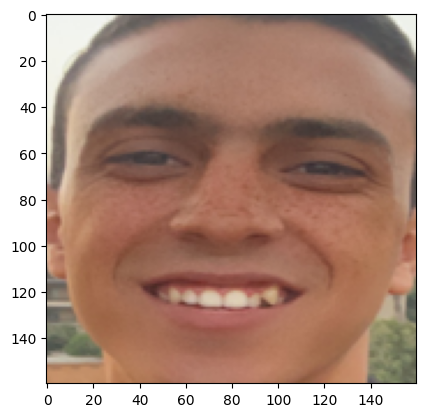

(160, 160, 3)


In [13]:
pixels = extract_face('/content/drive/MyDrive/img_dataset/Amr Elmasry/IMG_7696.JPG')
plt.imshow(pixels)
plt.show()
print(pixels.shape)

In [14]:
dictt = Which_person('/content/drive/MyDrive/img_dataset/Amr Elmasry/IMG_7696.JPG', '/content/drive/MyDrive/img_dataset/')
Person_Name = ''
min_distance = 1000
for person in dictt.keys():
  if dictt[person] < min_distance:
    Person_Name = person
    min_distance = dictt[person]

1/1 [==============================] - 0s 55ms/step


In [15]:
print(dictt)
threshold = 0.6
if min_distance > threshold:
  print('This Person Is Not Found')
else:
  print(f"The Person You Are Searching Four is ({Person_Name}) And Has Minimum Distance Equal to ({min_distance})")

{'Hugo_Chavez': 0.9488917028182187, 'Ahmed Helmy': 1.0281111454591154, 'Gerhard_Schroeder': 0.843965757638216, 'Tony_Blair': 0.9270603755488992, 'Amr Elmasry': 0.45266489187876385, 'Colin_Powell': 1.0871086640283465, 'George_W_Bush': 0.9554822126374347, 'AL-Limby': 0.929494522465393, 'Jacques_Chirac': 1.108174692839384, 'Donald_Rumsfeld': 0.9995866906363517, 'Vladimir_Putin': 0.9058002837002277}
The Person You Are Searching Four is (Amr Elmasry) And Has Minimum Distance Equal to (0.45266489187876385)
